In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
limit_rows   = 7000000
df           = pd.read_csv("./data/sample_sorted_train.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 1.2e4
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.ncodpers.isin(unique_id)]
df.describe()

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (5,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2572: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)
/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,183238.000000,182742.000000,182741.0,181878.000000,182742.000000,1.585270e+05,183238.000000,183238.000000,183238.000000,183238.000000,...,183238.000000,183238.000000,183238.000000,183238.000000,183238.000000,183238.000000,183238.000000,182871.000000,182871.000000,183238.000000
mean,29013.633078,1.092776,1.0,26.413838,0.575790,1.981779e+05,0.000464,0.000186,0.538011,0.001561,...,0.021682,0.059464,0.004677,0.148081,0.140249,0.116750,0.013753,0.115092,0.136588,0.251121
std,7932.746748,3.013877,0.0,10.292448,0.494224,2.873045e+05,0.021533,0.013620,0.498554,0.039476,...,0.145644,0.236491,0.068229,0.355181,0.347246,0.321123,0.116463,0.319134,0.343413,0.433659
min,15889.000000,1.000000,1.0,1.000000,0.000000,1.355226e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22011.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,29048.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,35810.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000
max,43136.000000,99.000000,1.0,52.000000,1.000000,1.126706e+07,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

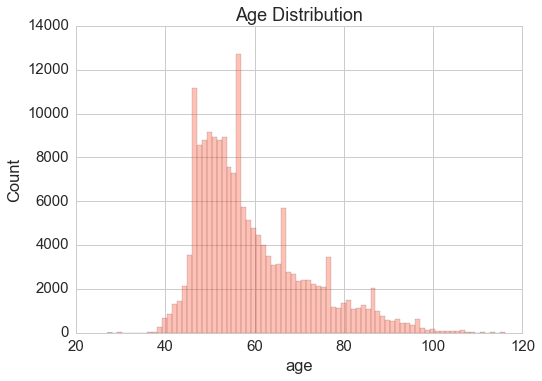

In [8]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.set_style('whitegrid')
    sns.distplot(df["age"].dropna(),
                 bins = 80,
                 kde = False,
                 color = "tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [9]:
df.loc[df.age < 18, "age"] = df.loc[(df.age > 18) & (df.age <= 30), "age"].mean(skipna=True)
df.loc[df.age > 100, "age"] = df.loc[(df.age > 30) & (df.age <=100), "age"].mean(skipna=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['age'] = df['age'].astype(int)

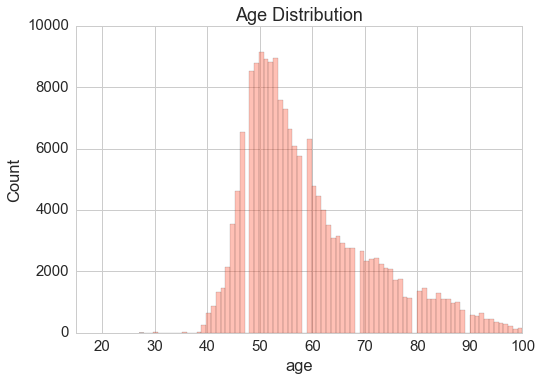

In [10]:
with sns.plotting_context('notebook', font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df['age'].dropna(),
                bins = 80,
                kde = False,
                color = 'tomato')
    sns.plt.title('Age Distribution')
    plt.ylabel("Count")
    plt.xlim((15, 100))

In [11]:
df["ind_nuevo"].isnull().sum()

496

In [12]:
months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

6

In [15]:
df.loc[df['ind_nuevo'].isnull(), 'ind_nuevo'] = 1

In [16]:
df.antiguedad = pd.to_numeric(df.antiguedad, errors='coerce')
np.sum(df['antiguedad'].isnull())

496

In [17]:
df.loc[df['antiguedad'].isnull(), 'ind_nuevo'].describe()

count     496
unique      1
top         1
freq      496
Name: ind_nuevo, dtype: int64

In [19]:
df.loc[df.antiguedad.isnull(),'antiguedad'] = df.antiguedad.min()
df.loc[df.antiguedad < 0, 'antiguedad'] = 0

In [25]:
dates = df.loc[:, 'fecha_alta'].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
df.loc[df.fecha_alta.isnull(), 'fecha_alta'] = dates.loc[median_date, 'fecha_alta']
df['fecha_alta'].describe()

count                  183238
unique                   2070
top       1995-10-30 00:00:00
freq                     2592
first     1995-01-16 00:00:00
last      2016-05-28 00:00:00
Name: fecha_alta, dtype: object

In [26]:
df['fecha_dato'].describe()

count                  183238
unique                     17
top       2015-07-28 00:00:00
freq                    11820
first     2015-01-28 00:00:00
last      2016-05-28 00:00:00
Name: fecha_dato, dtype: object

In [32]:
df.indrel.value_counts()

1.0     182569
99.0       173
Name: indrel, dtype: int64

In [33]:
df.loc[df.indrel.isnull(), 'indrel'] = 1

In [34]:
df.drop(['tipodom', 'cod_prov'], axis=1, inplace=True)

In [38]:
df.loc[df.ind_actividad_cliente.isnull(), "ind_actividad_cliente"] =\
    df.ind_actividad_cliente.median()

In [39]:
df.nomprov.unique()

array(['MADRID', 'BIZKAIA', 'PALMAS, LAS', 'BURGOS', 'CADIZ', 'ALICANTE',
       'ZAMORA', 'BARCELONA', 'GIPUZKOA', 'GUADALAJARA', nan, 'SEVILLA',
       'GRANADA', 'CORU\xc3\x91A, A', 'VALENCIA', 'BADAJOZ', 'CANTABRIA',
       'MALAGA', 'ALMERIA', 'PONTEVEDRA', 'ALAVA', 'GIRONA', 'AVILA',
       'MURCIA', 'SALAMANCA', 'SANTA CRUZ DE TENERIFE', 'SEGOVIA', 'JAEN',
       'TOLEDO', 'CACERES', 'NAVARRA', 'HUELVA', 'LERIDA', 'LUGO',
       'ZARAGOZA', 'BALEARS, ILLES', 'PALENCIA', 'TARRAGONA', 'CASTELLON',
       'CIUDAD REAL', 'VALLADOLID', 'ASTURIAS', 'OURENSE', 'RIOJA, LA',
       'CORDOBA', 'ALBACETE', 'CUENCA', 'HUESCA', 'LEON', 'MELILLA',
       'SORIA', 'TERUEL', 'CEUTA'], dtype=object)

In [40]:
df.loc[df.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

In [41]:
df.loc[df.nomprov.isnull(), 'nomprov'] = 'UNKNOWN'

In [42]:
df.renta.isnull().sum()

24711

In [56]:
incomes = df.loc[df.renta.notnull(), :].groupby('nomprov').agg({"renta": {"MedianIncome": median}})
incomes.sort_values(by=("renta", "MedianIncome"), inplace=True)
incomes.reset_index(inplace=True)

incomes.nomprovv = incomes.nomprov.astype('category', categories=list(df.nomprov.unique()), ordered=False)

incomes.head()

,nomprov,renta
,,MedianIncome
0,CUENCA,45010.74
1,LUGO,55291.65
2,AVILA,62280.15
3,CASTELLON,65460.03
4,CIUDAD REAL,65472.87


([<matplotlib.axis.YTick at 0x11772c090>,
 <a list of 5 Text yticklabel objects>)

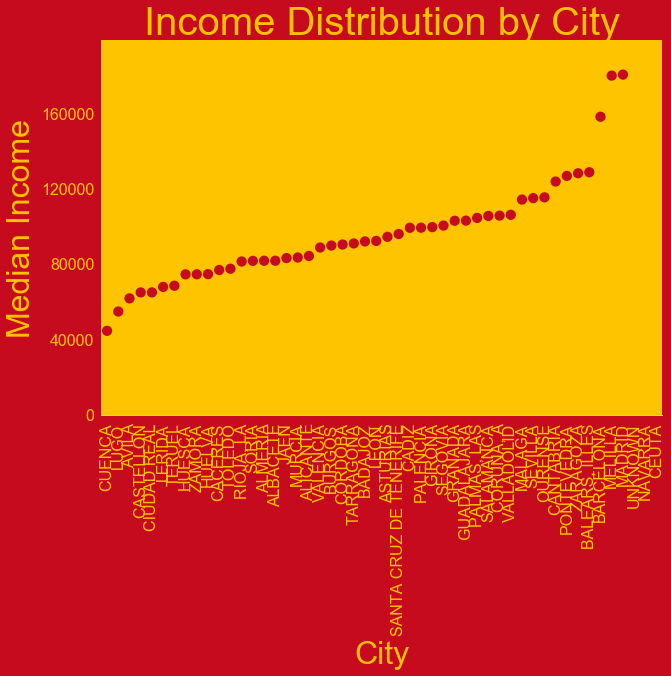

In [61]:
with sns.axes_style({
        "axes.facecolor": "#ffc400",
        "axes.grid": False,
        "figure.facecolor": "#c60b1e"
    }):
    h = sns.factorplot(data=incomes,
                      x="nomprov",
                      y=("renta", "MedianIncome"),
                      order=list(incomes.nomprov),
                      size=6,
                      aspect=1.5,
                      scale=1.0,
                      color="#c60b1e",
                      linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=16, labelcolor="#ffc400")
plt.ylabel("Median Income", size=32, color="#ffc400")
plt.xlabel("City", size=32, color="#ffc400")
plt.title("Income Distribution by City", size=40, color="#ffc400")
plt.ylim(0, 200000)
plt.yticks(range(0, 200000, 40000))

In [65]:
grouped = df.groupby('nomprov').agg({'renta': lambda x: x.median(skipna=True)}).reset_index()
new_incomes = pd.merge(df, grouped, how='inner', on='nomprov').loc[:,['nomprov', 'renta_y']]

new_incomes = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")

df.sort_values("nomprov", inplace=True)
df = df.reset_index()
new_incomes = new_incomes.reset_index()
df.loc[df.renta.isnull(), "renta"] = new_incomes.loc[df.renta.isnull(), "renta"].median()
df.sort_values(by='fecha_dato', inplace = True)

In [72]:
df.loc[df.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [80]:
string_data = df.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col, string_data[col].unique()))
del string_data

Unique values for ind_empleado:
['N' 'F' 'B' 'A' nan]

Unique values for pais_residencia:
['ES' nan 'FR' 'GB' 'US' 'CH' 'DE' 'CO' 'NL' 'IT' 'MX' 'MA' 'BE' 'PT' 'AR'
 'AE' 'PE' 'AD' 'CI' 'IN' 'JP' 'CR' 'QA' 'VE']

Unique values for sexo:
['V' 'H' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-15' '2015-07-06' '2015-07-22' '2015-07-17' '2015-07-20'
 '2015-07-07' '2015-07-03' '2015-07-28' '2015-07-27' '2015-07-21'
 '2015-08-18' '2015-08-03' '2015-08-19' '2015-08-13' '2015-08-20'
 '2015-08-05' '2015-08-24' '2015-09-08' '2015-09-23' '2015-09-29'
 '2015-09-01' '2015-09-21' '2015-09-15' '2015-10-13' '2015-10-06'
 '2015-10-20' '2015-10-28' '2015-10-02' '2015-10-27' '2015-10-21'
 '2015-10-05' '2015-11-11' '2015-11-23' '2015-11-24' '2015-11-27'
 '2015-11-12' '2015-11-10' '2015-11-16' '2015-11-02' '2015-12-04'
 '2015-12-02' '2015-12-17' '2015-12-28' '2015-12-03' '2015-12-01'
 '2015-12-24' '2015-12-09' '2015-12-10' '2015-12-11' '2015-12-15'
 '2016-01-22' '2016-01-19' '2016-01-11' '2016-01-0

In [83]:
df.loc[df.indfall.isnull(), 'indfall'] = 'N'
df.loc[df.tiprel_1mes.isnull(), 'tiprel_1mes'] = 'A'
df.tiprel_1mes = df.tiprel_1mes.astype('category')

map_dict = {
    '1.0': '1',
    '1': '1',
    '3.0': '3',
    'P': 'P',
    3.0: '3',
    2.0: '2',
    '3': '3',
    '2.0': '2',
    '4.0': '4',
    '4': '4',
    '2': '2',
    1.0: '1',
    4.0: '4'
}

df.indrel_1mes.fillna('P', inplace=True)
df.indrel_1mes = df.indrel_1mes.apply(lambda x: map_dict[x])
df.indrel_1mes = df.indrel_1mes.astype('category')

unknown_cols = [col for col in missing_columns if col not in ['indfall', 'tiprel_1mes', 'indrel_1mes']]
for col in unknown_cols:
    df.loc[df[col].isnull(), col] = "UNKNOWN"

In [84]:
df.isnull().any()

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco

In [85]:
feature_cols = df.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
for col in feature_cols:
    df[col] = df[col].astype(int)

In [86]:
unique_months = pd.DataFrame(pd.Series(df.fecha_dato.unique()).sort_values()).reset_index(drop=True)

In [88]:
unique_months['month_id'] = pd.Series(range(1, 1+unique_months.size))

In [90]:
unique_months["month_next_id"] = 1 + unique_months['month_id']
unique_months.rename(columns = {0: 'fecha_dato'}, inplace=True)

In [92]:
df = pd.merge(df, unique_months, on="fecha_dato")

In [93]:
df.head()

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,month_id,month_next_id
0,94924,2015-01-28,28312,N,ES,V,68,1995-11-30,0,236.0,...,0,0,0,0,0,0,0,1,1,2
1,141125,2015-01-28,34605,N,ES,V,52,1996-03-21,0,183.0,...,0,0,0,0,0,0,0,1,1,2
2,126138,2015-01-28,32434,N,ES,V,49,1996-01-31,0,169.0,...,1,1,0,0,0,0,1,1,1,2
3,126037,2015-01-28,32421,N,ES,V,54,1996-01-31,0,234.0,...,0,0,0,0,0,0,0,1,1,2
4,7470,2015-01-28,16738,N,ES,V,50,1995-05-05,0,243.0,...,1,0,0,0,1,1,1,1,1,2


In [94]:
unique_months

,fecha_dato,month_id,month_next_id
0,2015-01-28,1,2
1,2015-02-28,2,3
2,2015-03-28,3,4
3,2015-04-28,4,5
4,2015-05-28,5,6
5,2015-06-28,6,7
6,2015-07-28,7,8
7,2015-08-28,8,9
8,2015-09-28,9,10
9,2015-10-28,10,11


In [95]:
def status_change(x):
    diffs = x.diff().fillna(0)
    label = ["Added" if i == 1\
            else "Dropped" if i == -1\
            else "Maintained" for i in diffs]
    return label

In [99]:
df.loc[:, feature_cols] = df.loc[:, [i for i in feature_cols] + ['ncodpers']].groupby('ncodpers').transform(status_change)

In [125]:
df = pd.melt(df, id_vars = [col for col in df.columns if col not in feature_cols],
       value_vars = [col for col in feature_cols])


In [129]:
df = df.loc[df.value != "Maintained", :]
df.shape

(20625, 28)

([<matplotlib.axis.YTick at 0x11873d990>,
 <a list of 5 Text yticklabel objects>)

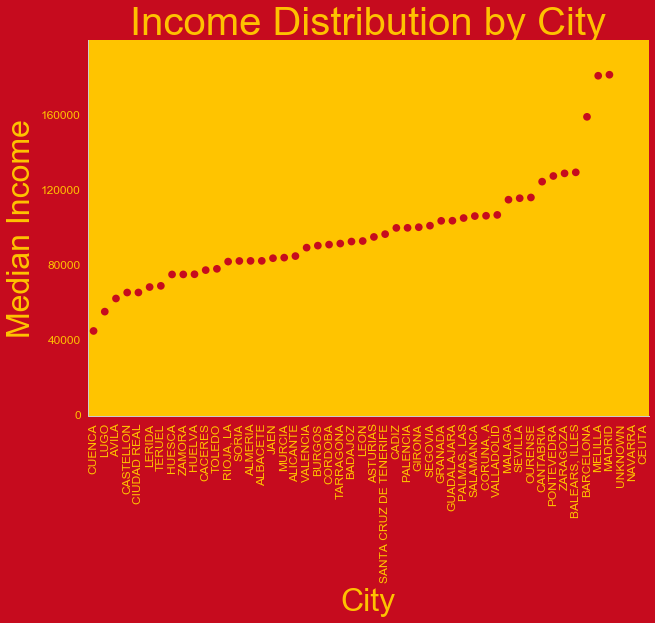

In [130]:
pylab.rcParams['figure.figsize'] = (6, 4)
with sns.axes_style({
        "axes.facecolor": "#ffc400",
        'axes.grid': False,
        'figure.facecolor': '#c60b1e'
    }):
    h = sns.factorplot(data = incomes,
                      x="nomprov",
                      y=('renta', 'MedianIncome'),
                      order=(i for i in incomes.nomprov),
                      size = 6,
                      aspect = 1.5,
                      scale = 0.75,
                      color="#c60b1e",
                      linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=12, labelcolor="#ffc400")
plt.ylabel("Median Income", size=32, color="#ffc400")
plt.xlabel("City", size=32, color="#ffc400")
plt.title("Income Distribution by City", size=40, color="#ffc400")
plt.ylim(0, 200000)
plt.yticks(range(0, 200000, 40000))